In [84]:
from matplotlib import pyplot as plt
import os
import numpy as np
%matplotlib inline
from matplotlib.offsetbox import AnchoredText

def addsubfiglabels(axx):
    try:
        len(axx)
    except TypeError:
        return
    ascii_letters = 'abcdefghijklmnopqrstuvwxyz'*(len(axx.ravel())//26+1)
    for letter,ax in zip(ascii_letters,axx.ravel()):
        at = AnchoredText(letter,frameon=True, loc='upper left')#prop=dict(size=15)
        at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
        ax.add_artist(at)

## determine the mean height of peaks vs overvoltage

In [85]:
datafolder = "overvoltage_apd1/"
files = sorted(os.listdir(datafolder))
file=files[0]
files

['1423v.CSV', '1443v.CSV', '1493v.CSV', '1543v.CSV', '1593v.CSV', '1643v.CSV']

In [74]:
def get_oscilloscope_data(file,headers=True,raw=False):
    data = ""
    with open(file,"r") as f:#f"{datafolder}{file}"
        data = f.readlines()
    if not headers: # returns just the data portion
        return data[25:]
    
    numCH = len(data[0].split(","))//2
    scopeHeaders=dict([(i+1,dict()) for i in range(numCH)]) # indexed from 1
    for h in data[:24]:
        h = h.split(",")
        for ch in range(1,numCH+1):
            try:
                scopeHeaders[ch][h[0]] = float(h[int((ch-1)*2+1)])
            except ValueError:
                scopeHeaders[ch][h[0]] = h[int((ch-1)*2+1)]
    if raw:
        return data[25:],scopeHeaders
    parsed_data = dict([(ch,[]) for ch in range(1,numCH+1)])
    for dd in data[25:]:
        dd = dd.split(",")
        for i,d in enumerate(dd[:-1]):
            parsed_data[i+1].append(int(d))
    parsed_data = dict([(ch,np.array(parsed_data[ch])) for ch in range(1,numCH+1)])
    return parsed_data,scopeHeaders

In [75]:
dataseq,headers=get_oscilloscope_data(f"{datafolder}{file}")

In [76]:
headers

{1: {'Format': '1.0B',
  'Memory Length': 10000.0,
  'IntpDistance': 0.0,
  'Trigger Address': 4999.0,
  'Trigger Level': 0.042,
  'Source': 'CH1',
  'Vertical Units': 'V',
  'Vertical Units Div': 0.0,
  'Vertical Units Extend Div': 16.0,
  'Label': '',
  'Probe Type': 0.0,
  'Probe Ratio': 10.0,
  'Vertical Scale': 0.1,
  'Vertical Position': 0.0,
  'Horizontal Units': 'S',
  'Horizontal Scale': 1e-05,
  'Horizontal Position': 0.0,
  'Horizontal Mode': 'Main',
  'SincET Mode': 'Real Time',
  'Sampling Period': 1e-08,
  'Horizontal Old Scale': 1e-05,
  'Horizontal Old Position': 0.0,
  'Firmware': 'V1.23',
  'Mode': 'Fast'}}

In [77]:
headers[1]["Sampling Period"],headers[1]["Vertical Scale"]

(1e-08, 0.1)

In [78]:
def getvoltage(oscilloscope_data,header):
    return oscilloscope_data*header["Vertical Scale"]/header["Vertical Units Extend Div"]-header["Vertical Position"]

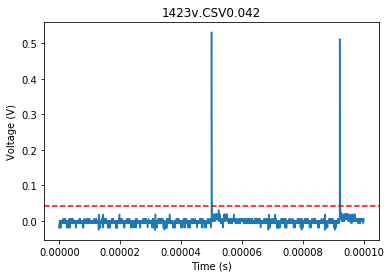

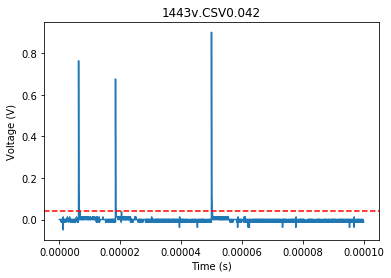

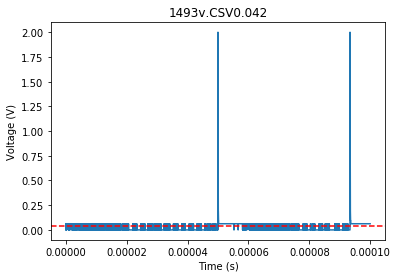

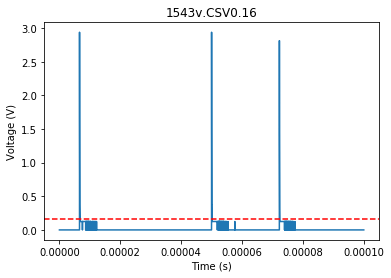

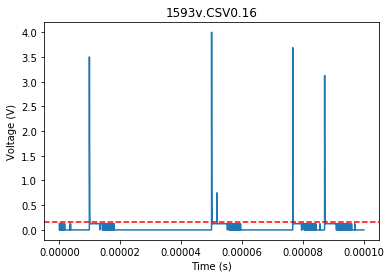

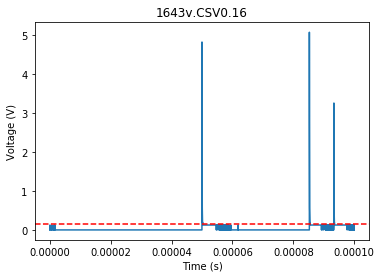

In [83]:
for file in files:
    dataseq,headers=get_oscilloscope_data(f"{datafolder}{file}")
    plt.figure()
    plt.plot(np.arange(len(dataseq[1]))*headers[1]["Sampling Period"],getvoltage(dataseq[1],headers[1]))
    plt.axhline(headers[1]["Trigger Level"],c="r",ls="--")
    plt.title(file+f'{headers[1]["Trigger Level"]}')
    plt.ylabel("Voltage (V)")
    plt.xlabel("Time (s)")
    plt.show()